In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
dataset= pd.read_csv('/content/House_price_prediction_using_Linear_Regression.csv')
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

In [4]:
dataset.head()

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [5]:
dataset.describe()

,area,price
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [6]:
dataset.shape

(1460, 2)

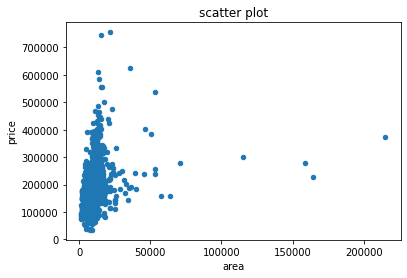

In [7]:
dataset.plot(kind='scatter',x='area',y='price')
plt.title("scatter plot")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20,random_state= 0)

In [9]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,Y_train)

LinearRegression()

In [10]:
Y_pred=slr.predict(X_test)

In [11]:
Y_pred


array([221735.09096926, 178770.45529989, 174182.59296139, 179725.10140264,
       164293.20080951, 174525.52408568, 189458.78428727, 177862.15124095,
       190139.0854906 , 170642.06081329, 169020.08927948, 182496.35562327,
       181128.33848961, 175708.17304405, 182800.35943075, 176749.94218919,
       180060.61779992, 176138.22721073, 177016.87236162, 165813.21984692,
       176972.38399955, 169405.65508409, 176883.4072754 , 176240.17970714,
       178084.5930513 , 193935.42572059, 165103.25973554, 164767.74333826,
       185807.031234  , 176898.23672943, 182450.01357945, 178449.76835663,
       175155.77588168, 187612.51726136, 183134.02214628, 201722.74276465,
       174734.99012376, 175452.36496214, 178557.2818983 , 183897.73902849,
       184563.21077779, 174403.18108999, 177430.24339252, 182240.54754137,
       189240.04984043, 180872.53040771, 176444.08469996, 180920.72613328,
       181910.59218935, 181754.8829221 , 186552.21129868, 180251.54702048,
       179067.04438035, 1

In [12]:
m=slr.coef_
print(m)

[1.85368175]


In [13]:
c=slr.intercept_
print(c)

161179.01546459418


In [14]:
#Method1 
price=161179.01546459418+1.85368175*1                     #y(area)=intercept+coeff*area like this we can give 1,2,3,4...
price

161180.8691463442

In [15]:
#Method2
X=[[1,]]
price=slr.predict(X)
price

array([161180.86914635])

In [16]:
#Method3
Y =m*X +c
print("The Minutes of{0} Units are:{1}".format(X[0],Y[0]))

The Minutes of[1] Units are:[161180.86914635]


1.Mean squared error(MSE)

In [17]:
#manually
mse=np.mean((Y_test-Y_pred.ravel())**2)
print("Mean Squared Error=",mse)

Mean Squared Error= 6314915402.010567


In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error=",mse)

Mean Squared Error= 6314915402.010567


2.Root Mean Squared Value(RMSE)

In [19]:
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error=",rmse)

Root Mean Squared Error= 79466.44198660569


3.Mean Absolute Error(MAE)

In [20]:
from sklearn.metrics import mean_absolute_error
mape=np.mean(np.abs((Y_test-Y_pred.ravel())/Y_pred.ravel()))*100  #we need to do this manually
print("Mean Absolute Percentage Error of the model:",mape)

Mean Absolute Percentage Error of the model: 30.133498463482255


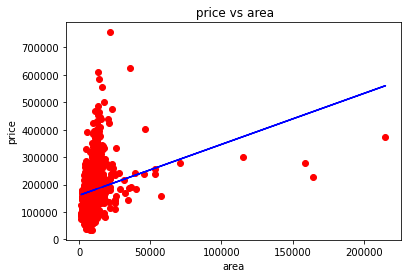

In [21]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,slr.predict(X_train),color='blue')
plt.title(' price vs area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

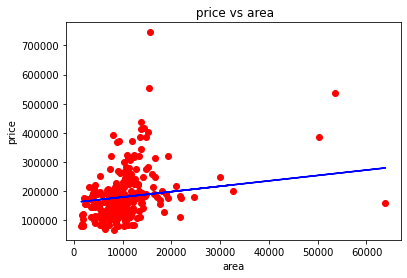

In [22]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,slr.predict(X_test),color='blue')
plt.title(' price vs area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()